# How to make a scatter plot

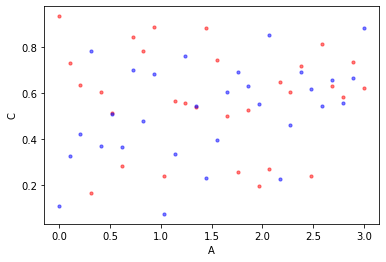

In [40]:
import pandas as pd
import numpy as np
from numpy import random

df = pd.DataFrame({
    'A': np.linspace(0,3,30),
    'B': random.beta(2,2,size=30),
    'C': random.beta(2,2,size=30)
})
df.head()

ax1 = df.plot.scatter('A','B',
              s=10, 
            color = 'red',
                alpha=0.5
               )

df.plot.scatter('A','C',
                ax=ax1,
              s=10, 
            color = 'blue',
                alpha=0.5
               )

# How to estimate binary logit models with statsmodel


Sysematic utilities for walking and bus, respectively:

$$
 V_w = \alpha_w + \beta_{T,w} T_{w}
$$


$$
 V_b = \beta_{T,b} T_{b} + \beta_{\text{transfer}} D_{\text{transfer}}
$$


$$
P_w(V_w,V_b) = \frac{\exp(V_w)}{\exp(V_w)+\exp(V_b)} = \frac{1}{1+\exp({V_b-V_w})}
$$


## Creating fake data

In [61]:
import numpy as np
import pandas as pd
from numpy import random
random.seed(30)

# a model of people choosing between walking and bus on different blocks

N =1000

#unknowns
αw = 1
βTb = -2
βTw = -3
βtransfer = -1.25

#known
data = pd.DataFrame({
    'Tb':random.lognormal(0.2,0.2,size=N),
    'Tw':random.lognormal(0.4,0.2,size=N),
    'transfer': random.choice([0,1],N,p=[0.7,0.3])#30% of the bus routes have a transfer
})

#unknowns
Vdf = pd.DataFrame({
   'Vw': αw + βTw*data.Tw + random.normal(0.,.15,size=N), 
   'Vb': βTb*data.Tb + βtransfer*data.transfer + random.normal(0.,.15,size=N)
})

#known 
PwActual = np.exp(Vdf.Vw)/(np.exp(Vdf.Vw) + np.exp(Vdf.Vb))
PwActual.head()

0    0.154385
1    0.185282
2    0.123266
3    0.289250
4    0.196247
dtype: float64

## Estimating a model from the data

In [62]:
import statsmodels.api as sm

exog = sm.add_constant(data)
exog.head()

model = sm.Logit(PwActual, exog)
res = model.fit()
res.summary()#gives you all the info you'd want to know

Optimization terminated successfully.
         Current function value: 0.461382
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Feb 2021   Pseudo R-squ.:                  0.1603
Time:                        09:47:22   Log-Likelihood:                -461.38
converged:                       True   LL-Null:                       -549.44
Covariance Type:            nonrobust   LLR p-value:                 6.104e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0426      0.548      1.902      0.057      -0.032       2.117
Tb             1.9584      0.308      6.355      0.000       1.354       2.562
Tw            -2.9719      0.295    -10.079      0.000      -3.550      -2.394
transfer       1.2151      0.161      7.560      0.000       0.900       1.530
==============================================================================
"""

In [ ]:
# to see the params alone
res.params

In [46]:
print(res.predict()) #here are the predicted mode shares

0      0.124228
1      0.218614
2      0.183876
3      0.275138
4      0.176657
         ...   
995    0.445415
996    0.405022
997    0.390963
998    0.114890
999    0.309919
Length: 1000, dtype: float64

In [ ]:
#this should give you the same predictions
params = res.params
αw = params.const
βTw = params.Tw
# the parameters for the mode you're NOT estimating need to have their signs reversed
βTb = -params.Tb
βtransfer = -params.transfer
Vb = data.Tb*βTb + data.transfer*βtransfer
Vw = data.Tw*βTw + αw
np.exp(Vw)/(np.exp(Vw)+np.exp(Vb)) #this should be the same

In [ ]:
# this hsould give you the same mode share
ΔV = exog.dot(res.params) #V_w - V_b
1/(1+np.exp(ΔV))

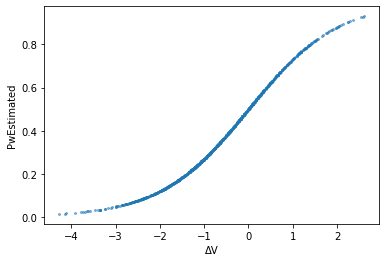

In [49]:
plotdf = pd.DataFrame({
    'ΔV': ΔV,
    'PwEstimated': res.predict()
})
plotdf.plot.scatter('ΔV','PwEstimated',alpha=0.5,s=4)

# Write and read data from csv

In [58]:
df.to_csv('test.csv',index=False)
pd.read_csv('test.csv')

,A,B,C
0,0.000000,0.932798,0.111059
1,0.103448,0.730741,0.329319
2,0.206897,0.635924,0.422571
3,0.310345,0.166738,0.783889
4,0.413793,0.603679,0.370659
5,0.517241,0.512519,0.507171
6,0.620690,0.282135,0.367741
7,0.724138,0.844831,0.700657
8,0.827586,0.782988,0.479739
9,0.931034,0.885669,0.683409
